# Import Pakages 

In [1002]:
import numpy as np 
import pandas as pd 
import math
import csv
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
import scipy.stats as st
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Merge Dataset 

In [ ]:
#import raw data 
data_agg=pd.read_csv('aggregatedperformance.csv')
data_ads_impression=pd.read_csv('ads_impression.csv')
data_all_order_impression=pd.read_csv('all_orders_impressions.csv')
data_basic=pd.read_csv('basic_info.csv')
data_label=pd.read_csv('label.csv')
position=pd.read_csv('position.csv')
data_all_impression=pd.read_csv('all_impression.csv')
data_agg=pd.merge(data_agg,data_all_order_impression,on="restaurant_uuid",how="left")
data_agg.drop('all_impression', inplace=True, axis=1)
data_agg=pd.merge(data_agg,data_ads_impression,on="restaurant_uuid",how="left")
data_agg=pd.merge(data_agg,data_basic,left_on="restaurant_uuid",right_on='uuid',how="left")
data_agg=pd.merge(data_agg,data_all_impression,on="restaurant_uuid",how="left")
data_agg=pd.merge(data_agg,data_label,on="restaurant_uuid",how="left")
data_agg=pd.merge(data_agg,position,on="restaurant_uuid",how="left")
data_agg=pd.merge(data_agg,position,on="restaurant_uuid",how="left")
data_agg["organic_impression"]=data_agg["all_impression"]-data_agg["weekly_total_impressions"]
data_agg["organic_order"]=data_agg["all_orders"]-data_agg["weekly_total_orders"]
#convert category predictors to dummy variables
data_agg_clean['DELIVERY'] = data_agg_clean['DELIVERY'].astype(int)
data_agg_clean['PICKUP'] = data_agg_clean['PICKUP'].astype(int)
data_agg_clean['Churn'] = data_agg_clean['Churn'].astype('category')
data_agg_clean['DELIVERY_THIRD_PARTY'] = data_agg_clean['DELIVERY_THIRD_PARTY'].astype(int)
data_agg_clean['DINE_IN'] = data_agg_clean['DINE_IN'].astype(int)
data_agg_clean['eats_max_delivery_radius'] = data_agg_clean['eats_max_delivery_radius'].astype(float)
data_agg_clean['eats_marketplace_fee'] = data_agg_clean['eats_marketplace_fee'].astype(float)
data_agg_clean = pd.get_dummies(data_agg_clean, columns=['eats_price_bucket', 'uber_merchant_type'], drop_first=True)
data_agg_clean.dtypes

# Data Preperation 

In [906]:
data_agg_clean=pd.read_csv('clean.csv')
data_agg_clean = data_agg_clean.replace('\\N', np.nan)
data_agg_clean.isnull().sum()
data_agg_clean=data_agg_clean.dropna()
data_agg_clean.dtypes

restaurant_uuid                   object
weekly_ads_budget_amount         float64
weekly_ads_billed_spend          float64
weekly_total_ads_revenue         float64
average_weekly_roas              float64
weekly_total_ads_impressions     float64
weekly_ads_total_clicks          float64
weekly_click_through_rate        float64
weekly_cost_per_click            float64
weekly_ads_orders                float64
weekly_auto_bid_campaigns        float64
weekly_total_active_campaigns    float64
weekly_total_exposed_revenue     float64
weekly_credit_spend_total        float64
weekly_gbs_usd                   float64
weekly_total_completed_trips      object
weekly_capped_budget             float64
all_orders                       float64
ads_impression                   float64
DAYS2FT                            int64
PICKUP                             int64
DELIVERY                           int64
DELIVERY_THIRD_PARTY               int64
DINE_IN                            int64
eats_price_bucke

In [665]:
#delete abnornal records 
data_agg_clean=data_agg_clean[(data_agg_clean["organic_impression"]>0)&
                              (data_agg_clean["organic_order"]>0)&
                              (data_agg_clean["Rank"]>0)]

data_agg_clean


,restaurant_uuid,weekly_ads_budget_amount,weekly_ads_billed_spend,weekly_total_ads_revenue,average_weekly_roas,weekly_total_ads_impressions,weekly_ads_total_clicks,weekly_click_through_rate,weekly_cost_per_click,weekly_ads_orders,weekly_auto_bid_campaigns,weekly_total_active_campaigns,weekly_total_exposed_revenue,weekly_credit_spend_total,weekly_gbs_usd,weekly_total_completed_trips,weekly_capped_budget,all_orders,ads_impression,DAYS2FT,PICKUP,DELIVERY,DELIVERY_THIRD_PARTY,DINE_IN,eats_max_delivery_radius,eats_marketplace_fee,eats_expected_prep_time,all_impression,Churn,Rank,organic_impression,organic_order,eats_price_bucket_2,eats_price_bucket_3,eats_price_bucket_4,eats_price_bucket_unknown,uber_merchant_type_MERCHANT_TYPE_FLORIST,uber_merchant_type_MERCHANT_TYPE_GROCERY,uber_merchant_type_MERCHANT_TYPE_LIQUOR,uber_merchant_type_MERCHANT_TYPE_PHARMACY,uber_merchant_type_MERCHANT_TYPE_RESTAURANT,uber_merchant_type_MERCHANT_TYPE_RETAIL,uber_merchant_type_MERCHANT_TYPE_SPECIALTY_FOOD
0,3415d95b-da4f-5235-99f7-d6e8b9e987ca,26.610644,26.113316,315.723529,11.388856,1554.166667,74.166667,0.048977,0.353136,18.833333,6.166667,6.166667,449.272549,0.000000,952.400000,43.33333333,25.110044,49.333333,1554.166667,84,1,1,0,0,2.1,30.0,5,5134.777778,0,5.776191,3580.611111,30.500000,0,0,0,1,0,0,0,0,1,0,0
2,480bd9cd-5af3-4c6d-bbee-fa120a59e28e,14.913836,11.988629,81.432353,5.103776,1681.250000,23.750000,0.014433,0.496954,3.250000,5.500000,5.500000,127.152941,11.750000,931.841176,30.25,13.256743,31.000000,1681.250000,7,0,1,0,0,2.0,27.0,10,2221.500000,1,0.657836,540.250000,27.750000,0,0,0,1,0,0,0,0,0,0,0
5,5445130c-36be-504e-9223-62b93d2c23cf,50.044926,36.712957,515.588235,14.263077,1483.000000,85.666667,0.060348,0.475724,19.000000,4.333333,4.333333,838.274510,36.666667,1047.968627,36,36.300182,37.500000,1483.000000,7,0,1,0,0,2.5,15.0,10,2023.300000,1,0.269180,540.300000,18.500000,0,0,0,0,0,1,0,0,0,0,0
9,0f57acc5-4617-577f-bba4-9d89ba8bdaf6,17.755121,12.002650,81.455882,12.677870,1566.750000,24.250000,0.014874,0.477501,2.000000,5.500000,5.500000,106.147059,12.000000,891.673529,24.5,15.782329,26.500000,1566.750000,15,0,1,0,0,2.5,19.0,30,2601.000000,1,0.985541,1034.250000,24.500000,0,0,0,0,0,1,0,0,0,0,0
10,10c12b2d-7908-4188-a74f-b0a4a0a52035,29.411765,29.270178,129.521569,4.335924,3180.000000,78.083333,0.027150,0.385123,8.916667,7.000000,7.000000,196.414706,0.250000,346.208823,18.33333333,29.411765,16.916667,3180.000000,15,1,1,0,0,2.4,30.0,20,4633.000000,0,8.832953,1453.000000,8.000000,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14621,bfdf6b93-436a-4390-940e-0d0a981609ab,29.411765,29.411765,408.862745,13.808499,1452.916667,51.166667,0.036225,0.577848,14.000000,7.000000,7.000000,598.199019,0.000000,1552.098039,44.08333333,29.411765,40.750000,1452.916667,15,1,0,1,0,2.3,30.0,10,4244.583333,0,9.641309,2791.666667,26.750000,0,0,0,0,0,0,0,0,1,0,0
14622,c028ecb6-1832-4343-b76c-3e2c668a8919,23.529412,23.058574,103.248235,4.336858,1995.100000,65.800000,0.033831,0.360046,6.300000,7.000000,7.000000,180.529412,0.000000,441.091765,19.6,23.529412,15.750000,1995.100000,7,1,1,1,0,2.1,30.0,30,3135.833333,1,9.387570,1140.733333,9.450000,1,0,0,0,0,0,0,0,1,0,0
14623,c10f306c-571e-4dd5-895b-466ab1ab7c34,23.529412,23.424002,294.730392,12.396322,928.916667,53.583333,0.058762,0.447622,11.750000,7.000000,7.000000,367.485294,0.000000,1113.041176,35.5,23.529412,32.000000,928.916667,13,1,1,1,0,2.1,30.0,30,5194.833333,0,8.887859,4265.916667,20.250000,0,0,0,1,0,0,0,0,1,0,0
14624,c538ff68-aedc-51f7-9704-c72923e7df0a,21.008403,21.677028,108.285294,4.988498,1977.000000,53.500000,0.027610,0.411535,3.500000,6.250000,6.250000,162.691176,0.000000,339.841176,9.5,20.648259,8.583333,1977.000000,14,1,1,0,0,2.8,30.0,40,2064.083333,0,7.531376,87.083333,5.083333,0,0,0,0,0,0,0,0,1,0,0


In [909]:
# Find out the Fields with high correlation
correlated_features = set()
for i in range(len(data_agg_clean.corr().columns)):
    for j in range(i):
        if abs(data_agg_clean.corr().iloc[i, j]) > 0.70:
            colname1 = data_agg_clean.corr().columns[i]
            colname2 = data_agg_clean.corr().columns[j]
            print(abs(data_agg_clean.corr().iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

0.7905924852868342 -- 2 -- 1 -- weekly_total_ads_revenue -- weekly_ads_billed_spend
0.9000641924899538 -- 4 -- 1 -- weekly_total_ads_impressions -- weekly_ads_billed_spend
0.946550650003684 -- 5 -- 1 -- weekly_ads_total_clicks -- weekly_ads_billed_spend
0.8246882716241807 -- 5 -- 2 -- weekly_ads_total_clicks -- weekly_total_ads_revenue
0.8842774256895052 -- 5 -- 4 -- weekly_ads_total_clicks -- weekly_total_ads_impressions
0.754502869121288 -- 8 -- 1 -- weekly_ads_orders -- weekly_ads_billed_spend
0.9606083436887723 -- 8 -- 2 -- weekly_ads_orders -- weekly_total_ads_revenue
0.7992700493302439 -- 8 -- 5 -- weekly_ads_orders -- weekly_ads_total_clicks
0.7409894668288536 -- 11 -- 1 -- weekly_total_exposed_revenue -- weekly_ads_billed_spend
0.9890946136784856 -- 11 -- 2 -- weekly_total_exposed_revenue -- weekly_total_ads_revenue
0.785017316443206 -- 11 -- 5 -- weekly_total_exposed_revenue -- weekly_ads_total_clicks
0.9518677440043932 -- 11 -- 8 -- weekly_total_exposed_revenue -- weekly_ads_

In [910]:
#Drop highly corelated columns 
data_final = data_agg_clean.drop(['restaurant_uuid','weekly_capped_budget', 'all_orders', 'organic_impression', 'organic_order', 'all_impression',"PICKUP","DELIVERY","DELIVERY_THIRD_PARTY",'DINE_IN','eats_price_bucket_unknown','weekly_total_exposed_revenue','weekly_total_ads_revenue','weekly_ads_billed_spend','weekly_total_completed_trips','ads_impression','weekly_ads_total_clicks','eats_price_bucket_4','uber_merchant_type_MERCHANT_TYPE_PHARMACY','uber_merchant_type_MERCHANT_TYPE_RETAIL','weekly_ads_orders'], 1) 


# Find out the Fields with high correlation
correlated_features = set()
for i in range(len(data_final.corr().columns)):
    for j in range(i):
        if abs(data_final.corr().iloc[i, j]) > 0.70:
            colname1 = data_final.corr().columns[i]
            colname2 = data_final.corr().columns[j]
            print(abs(data_final.corr().iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

/var/folders/yh/q1hntx59725g3ly27jm1_2nc0000gn/T/ipykernel_45724/2522671137.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_final = data_agg_clean.drop(['restaurant_uuid','weekly_capped_budget', 'all_orders', 'organic_impression', 'organic_order', 'all_impression',"PICKUP","DELIVERY","DELIVERY_THIRD_PARTY",'DINE_IN','eats_price_bucket_unknown','weekly_total_exposed_revenue','weekly_total_ads_revenue','weekly_ads_billed_spend','weekly_total_completed_trips','ads_impression','weekly_ads_total_clicks','eats_price_bucket_4','uber_merchant_type_MERCHANT_TYPE_PHARMACY','uber_merchant_type_MERCHANT_TYPE_RETAIL','weekly_ads_orders'], 1)


KeyError: "['eats_price_bucket_unknown' 'eats_price_bucket_4'\n 'uber_merchant_type_MERCHANT_TYPE_PHARMACY'\n 'uber_merchant_type_MERCHANT_TYPE_RETAIL'] not found in axis"

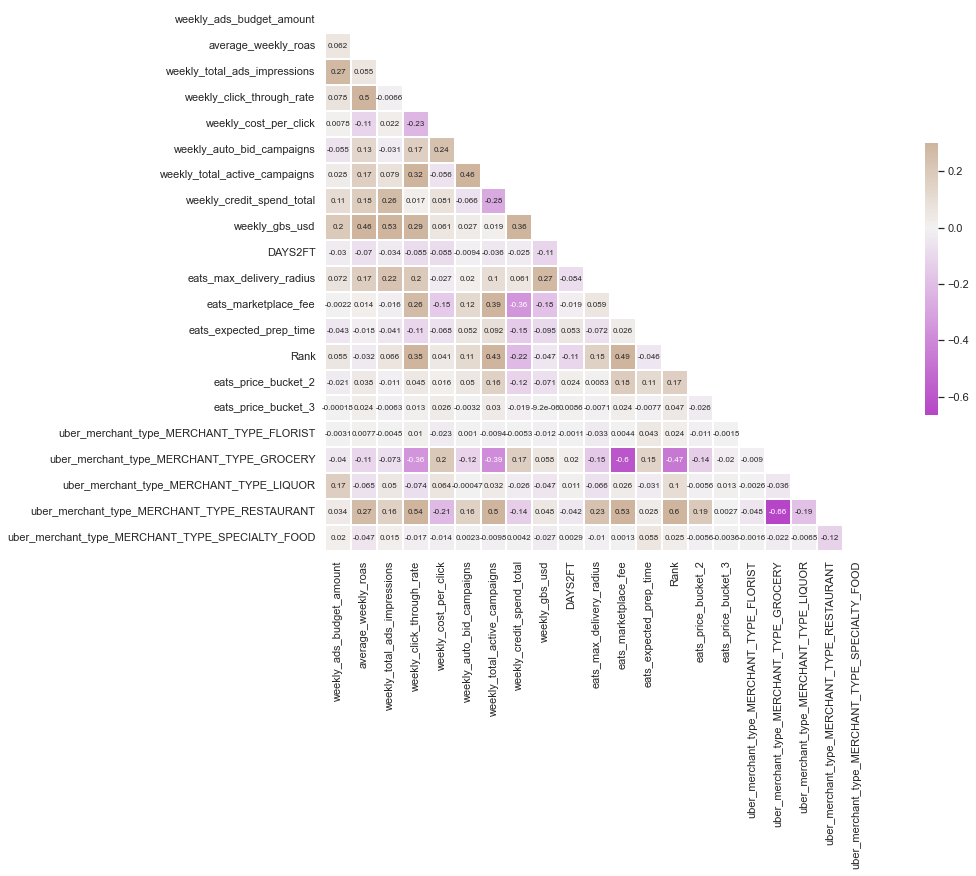

In [911]:
plt.figure(figsize = (20,10))
sns.set_theme(style="white")
cor=data_final.corr()
cmap = sns.diverging_palette(300, 40, as_cmap=True)
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .5},annot = True, annot_kws={"fontsize":8})
plt.show()

# Exploratory Analysis

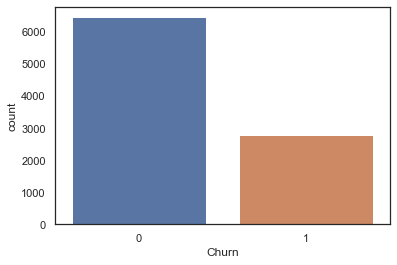

In [482]:
data_agg_clean.sort_values(by=['weekly_total_ads_impressions'], ascending=False)
sns.countplot(x=data_agg_clean["Churn"])
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='average_weekly_roas', ylabel='Count'>

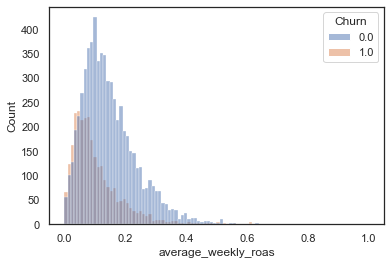

In [918]:
filtered = data_final_normalized[(data_final_normalized["average_weekly_roas"] >= 0) & (data_final_normalized["average_weekly_roas"] < 1)]
sns.histplot(data=filtered, x="average_weekly_roas",hue="Churn")

<AxesSubplot:xlabel='weekly_gbs_usd', ylabel='Count'>

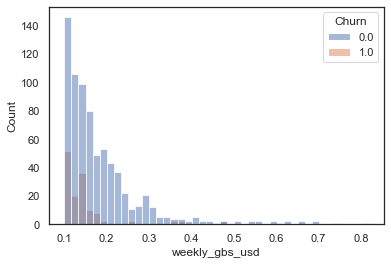

In [919]:
filtered = data_final_normalized[(data_final_normalized["weekly_gbs_usd"] >= 0.1) & (data_final_normalized["weekly_gbs_usd"] < 1)]
sns.histplot(data=filtered, x="weekly_gbs_usd",hue="Churn")

<AxesSubplot:xlabel='weekly_gbs_usd', ylabel='Count'>

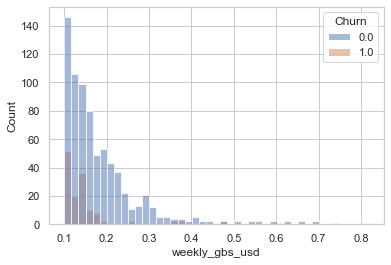

In [710]:
filtered = data_final_normalized[(data_final_normalized["weekly_total_ads_impressions"] >= 0.1) & (data_final_normalized["weekly_total_ads_impressions"] < 0.6)]
sns.histplot(data=filtered, x="weekly_total_ads_impressions",hue="Churn")

<AxesSubplot:xlabel='average_weekly_roas', ylabel='Count'>

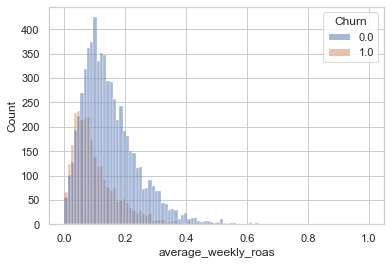

In [695]:
filtered = data_final_normalized[(data_final_normalized["weekly_click_through_rate"] >= 0.1) & (data_final_normalized["weekly_click_through_rate"] < 0.6)]
sns.histplot(data=filtered, x="weekly_click_through_rate",hue="Churn")

<AxesSubplot:xlabel='weekly_total_ads_impressions', ylabel='Count'>

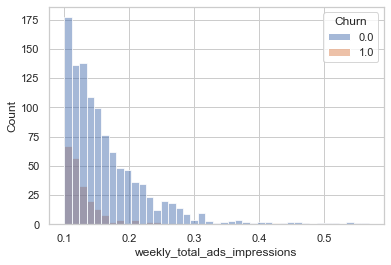

In [703]:
filtered = data_final_normalized[(data_final_normalized["weekly_total_active_campaigns"] >= 0) & (data_final_normalized["weekly_total_active_campaigns"] < 1)]
sns.histplot(data=filtered, x="weekly_total_active_campaigns",hue="Churn")

# Normalize & Oversampling the dataset 

In [912]:
#Normalize the data 
x= data_final.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_final_normalized = pd.DataFrame(x_scaled)
data_final_normalized.columns=data_final.columns.values
data_final_normalized.describe()

,weekly_ads_budget_amount,average_weekly_roas,weekly_total_ads_impressions,weekly_click_through_rate,weekly_cost_per_click,weekly_auto_bid_campaigns,weekly_total_active_campaigns,weekly_credit_spend_total,weekly_gbs_usd,DAYS2FT,eats_max_delivery_radius,eats_marketplace_fee,eats_expected_prep_time,Churn,Rank,eats_price_bucket_2,eats_price_bucket_3,uber_merchant_type_MERCHANT_TYPE_FLORIST,uber_merchant_type_MERCHANT_TYPE_GROCERY,uber_merchant_type_MERCHANT_TYPE_LIQUOR,uber_merchant_type_MERCHANT_TYPE_RESTAURANT,uber_merchant_type_MERCHANT_TYPE_SPECIALTY_FOOD
count,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000
mean,0.005610,0.135353,0.059946,0.172369,0.179157,0.472202,0.464257,0.027237,0.042614,0.399517,0.234503,0.759853,0.111869,0.300811,0.427498,0.167983,0.003245,0.000649,0.110438,0.010276,0.780746,0.004002
std,0.018545,0.090979,0.053687,0.090525,0.128075,0.133677,0.072648,0.075748,0.058322,0.053092,0.069687,0.150449,0.068425,0.458636,0.262501,0.373871,0.056875,0.025469,0.313452,0.100853,0.413763,0.063139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002175,0.069951,0.028158,0.105171,0.090078,0.434211,0.390935,0.000000,0.011523,0.393662,0.213333,0.714286,0.055556,0.000000,0.165968,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.002890,0.115302,0.043647,0.165838,0.157017,0.531100,0.510688,0.000000,0.023750,0.397928,0.213333,0.857143,0.111111,0.000000,0.483201,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.005785,0.181633,0.072825,0.227354,0.239895,0.552632,0.518414,0.017969,0.049817,0.407678,0.266667,0.857143,0.166667,1.000000,0.651449,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [913]:
#Over-sampling using SMOTE
X = data_final_normalized.loc[:, data_final_normalized.columns != 'Churn']
y = data_final_normalized.loc[:, data_final_normalized.columns == 'Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0,stratify=y)
#oversample on the training set 
os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X_train= pd.DataFrame(data=os_data_X,columns=columns )
os_data_y_train= pd.DataFrame(data=os_data_y,columns=['Churn'])

print("length of oversampled data is ",len(os_data_X))
print("Number of Active in oversampled data",len(os_data_y[os_data_y['Churn']==0]))
print("Number of Churn",len(os_data_y[os_data_y['Churn']==1]))
print("Proportion of Active data in oversampled data is ",len(os_data_y[os_data_y['Churn']==0])/len(os_data_X))
print("Proportion of Churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==1])/len(os_data_X))

length of oversampled data is  10342
Number of Active in oversampled data 5171
Number of Churn 5171
Proportion of Active data in oversampled data is  0.5
Proportion of Churn data in oversampled data is  0.5


In [914]:
#Finalised Training set 
X_train=os_data_X_train
y_train=os_data_y_train['Churn']

# Logistic Modeling 

In [915]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.348974
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10342
Model:                          Logit   Df Residuals:                    10321
Method:                           MLE   Df Model:                           20
Date:                Tue, 07 Mar 2023   Pseudo R-squ.:                  0.4965
Time:                        22:57:17   Log-Likelihood:                -3609.1
converged:                       True   LL-Null:                       -7168.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
weekly_ads_budget_amount         

In [916]:
#Only include variables that is significicant 
cols=['weekly_ads_budget_amount', 'average_weekly_roas',
       'weekly_click_through_rate',"weekly_cost_per_click",
       'weekly_total_active_campaigns', 'weekly_credit_spend_total',"DAYS2FT","eats_max_delivery_radius",
       'weekly_gbs_usd','Rank',"eats_marketplace_fee","eats_expected_prep_time",
       'uber_merchant_type_MERCHANT_TYPE_LIQUOR',"uber_merchant_type_MERCHANT_TYPE_GROCERY",
       'uber_merchant_type_MERCHANT_TYPE_RESTAURANT',
       'uber_merchant_type_MERCHANT_TYPE_SPECIALTY_FOOD']
# Rearragne the training set to only include the variables which is significant 
X_train=os_data_X[cols]
y_train=os_data_y['Churn']
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.351805
         Iterations 10
                                          Results: Logit
Model:                          Logit                       Pseudo R-squared:            0.492    
Dependent Variable:             Churn                       AIC:                         7308.7293
Date:                           2023-03-07 22:59            BIC:                         7424.6328
No. Observations:               10342                       Log-Likelihood:              -3638.4  
Df Model:                       15                          LL-Null:                     -7168.5  
Df Residuals:                   10326                       LLR p-value:                 0.0000   
Converged:                      1.0000                      Scale:                       1.0000   
No. Iterations:                 10.0000                                                           
------------------------------------------------

In [673]:
#Fit the logistic model 
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

In [917]:
#Logistic model Result 
y_pred = logreg.predict(X_test[cols])
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test[cols], y_test)))
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.878
[[1203   90]
 [ 135  421]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      1293
         1.0       0.82      0.76      0.79       556

    accuracy                           0.88      1849
   macro avg       0.86      0.84      0.85      1849
weighted avg       0.88      0.88      0.88      1849



In [959]:
# Clean test set/train set for other models 
X_test=X_test[cols]
#y_test
X_train=os_data_X[cols]
y_train=os_data_y_train['Churn']

# Decision Tree 


In [989]:
#Tunning the decision tree model by grid search ()
DT_model = DecisionTreeClassifier(random_state=0)

params = {
    'max_depth': range(1,23),
    'min_samples_leaf': [10,15,20],
    'min_samples_split': [2,3,4,5],
    'criterion': ["gini", "entropy"]
}

DT_model_search = GridSearchCV(DT_model, 
                           param_grid=params, 
                           cv=5)

In [990]:
#Fit the model with training sets 
DT_model_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 23),
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [2, 3, 4, 5]})

In [991]:
# Find the best hyperparameters 
DT_best_model = DT_model_search.best_estimator_
print(DT_best_model)
#Predict the result 
y_predict_DT=DT_best_model.predict(X_test)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=0)


In [992]:
#Result Assessment 
print(metrics.confusion_matrix(y_test,y_predict_DT))
print(metrics.accuracy_score(y_test,y_predict_DT))
print(classification_report(y_test, y_predict_DT))

[[1232   61]
 [  91  465]]
0.9177934018388318
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      1293
         1.0       0.88      0.84      0.86       556

    accuracy                           0.92      1849
   macro avg       0.91      0.89      0.90      1849
weighted avg       0.92      0.92      0.92      1849



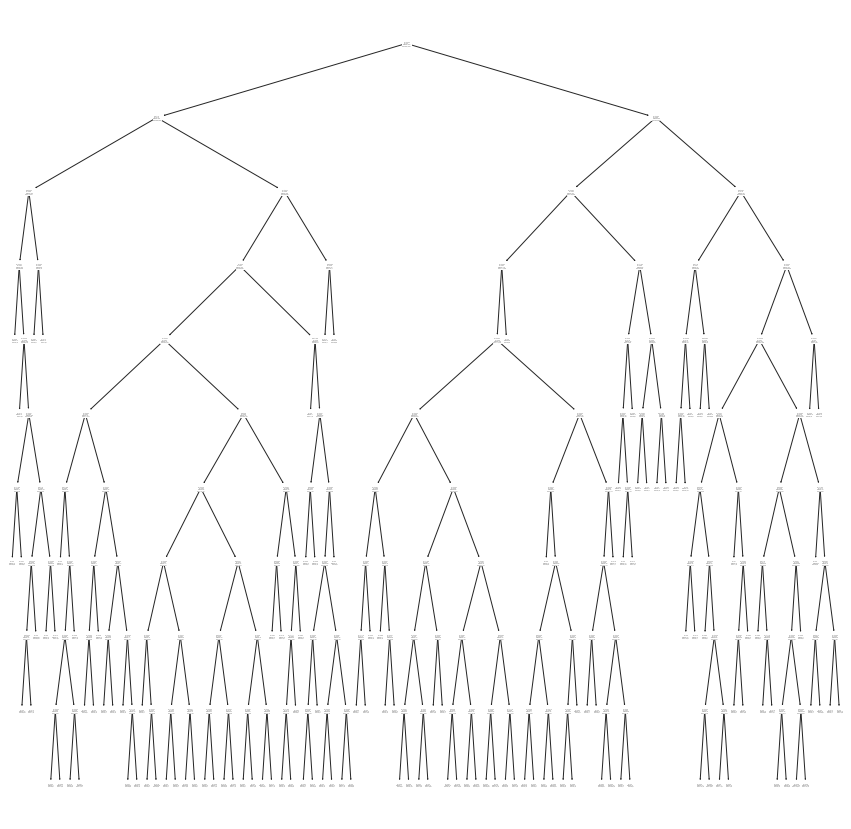

In [993]:
plt.figure(figsize=(15, 15))
tree.plot_tree(DT_best_model)
plt.show()

# Random Forest 

In [1008]:
## RF 
RF_model=RandomForestClassifier(random_state=0)

# model selection and tuning
param_grid = {'n_estimators': [500, 1000, 1500], # number of trees in the random forest
              'max_depth': range(1,23), # maximum number of levels allowed in each decision tree
              'min_samples_split': range(2,5)} # minimum sample number to split a node

RF_model_search = GridSearchCV(RF_model,
                       param_grid, cv=5)

In [1009]:
# Find the best hyperparameters 
RF_model_search.fit(X_train, y_train)
RF_best_model = RF_model_search.best_estimator_
print(RF_best_model)


RandomForestClassifier(max_depth=21, n_estimators=1500, random_state=0)


In [1010]:
#Predict the result 
y_predict_RF=RF_best_model.predict(X_test)

In [1011]:
#Result Assessment 
print(metrics.confusion_matrix(y_test,y_predict_RF))
print(metrics.accuracy_score(y_test,y_predict_RF))
print(classification_report(y_test, y_predict_RF))

[[1247   46]
 [  95  461]]
0.9237425635478637
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1293
         1.0       0.91      0.83      0.87       556

    accuracy                           0.92      1849
   macro avg       0.92      0.90      0.91      1849
weighted avg       0.92      0.92      0.92      1849



https://www.section.io/engineering-education/hyperparmeter-tuning/
https://medium.com/@alaind.fdr/churn-prediction-analysis-with-decision-tree-machine-learning-in-python-6795a4c98c43
https://www.kaggle.com/code/sivakrishnathota/customer-churn-prediction-decision-tree-classifier/notebook

In [1012]:
y_test
[y_test["Churn"]==0]

[5384    False
 8637    False
 7344     True
 1720     True
 946      True
         ...  
 3283     True
 7371     True
 8197     True
 5339     True
 4850    False
 Name: Churn, Length: 1849, dtype: bool]